<a href="https://colab.research.google.com/github/venkatbabukr/AllProjects/blob/main/Scaler/Modules/Pandas_Buzz_Terms%2C_Nuances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creation and Initialization

## Popular Initialization Methods

Here are the most common and popular ways to create and initialize a pandas DataFrame:

### 1. Initialization from Dictionary Structures

#### 1.1 From a Dictionary (where values are lists/arrays)
*   **Concept:** Keys become column names, and values (typically lists or arrays) become the column data.
*   **Use Case:** Very common when data is structured with clear column headers and their corresponding values.

#### 1.2 From a List of Dictionaries (where each dictionary is a row - JSON format)
*   **Concept:** Each dictionary in the list represents a row, with keys as column names and values as cell data for that row.
*   **Use Case:** Initialize from REST API responses etc...

### 2. Initialization from List Structures

#### 2.1 From a List of Lists (with columns)
*   **Concept:** Each inner list represents a row of data. Column names are provided separately.
*   **Use Case:** Useful when you have row-oriented data and want to explicitly define column labels.

#### 2.2 From a NumPy Array (with columns)
*   **Concept:** Uses a NumPy array as the underlying data structure. Column names are provided separately.
*   **Use Case:** Efficient for numerical data, especially when integrating with existing NumPy workflows.

### 3. Initialization from Plain Texts/Strings

#### 3.1 From a CSV File (or other file formats like Excel)
*   **Concept:** Reads data directly from a file, inferring columns and data types.
*   **Use Case:** A very frequent method for loading external datasets into a DataFrame.

#### 3.2 From String having delimiters using `io.StringIO`
*   **Concept:** Treats a string containing data (e.g., CSV, delimited text) as a file-like object.
*   **Use Case:** Useful for parsing data embedded directly in code or received as a string, avoiding temporary file creation.

### 4. Creating from `series`
*   **Concept:** A single Pandas Series can be directly converted into a DataFrame, where the Series becomes a column (or row, depending on orientation). Multiple Series can also be combined into a DataFrame, with each Series forming a separate column.
*   **Use Case:** Useful when you have data already structured as one or more Pandas Series and you need to combine them or convert a single Series into a DataFrame for further operations (like adding more columns, or using DataFrame-specific methods).

### 5. Creating an Empty DataFrame
*   **Concept:** Initializes a DataFrame with no rows and no columns.
*   **Use Case:** Often used as a starting point to which data will be added iteratively.

### 6. Creating an Empty DataFrame with Specified Columns
*   **Concept:** Initializes a DataFrame with predefined column names but no rows.
*   **Use Case:** Useful when you know the schema beforehand and plan to append data later, ensuring consistent column order and names.

In [38]:
%%writefile data.txt
A B C
1 2 3
4 5 6

Overwriting data.txt


In [39]:
import pandas as pd
import numpy as np
import io
import json # Added import for the json module

print("1. Initialization from Dictionary Structures", end = "\n")

print("1.1 Initializing from a Dictionary (where values are lists/arrays):")
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 28],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
df_from_data = pd.DataFrame(data)
print(f"""
data = {data}
df_from_data =
{df_from_data}

{"-" * 30}

""")

print("1.2 Initializing from a List of Dictionaries (JSON format):")
data = [
    {'Name': 'Alice', 'Age': 25, 'City': 'New York'},
    {'Name': 'Bob', 'Age': 30, 'City': 'Los Angeles'},
    {'Name': 'Charlie', 'Age': 35, 'City': 'Chicago'},
    {'Name': 'David', 'Age': 28, 'City': 'Houston'}
]
# 1.2.1: Constructor approach
df_from_data = pd.DataFrame(data)
print(f"""
1.2.1: Constructor approach
data = {data}
df_from_data = df.DataFrame(data) =
{df_from_data}

{"-" * 30}

""")

# 1.2.1: Using read_json method
data_json_str = json.dumps(data) # Convert list data to JSON string
df_from_data = pd.read_json(io.StringIO(data_json_str)) # Changed to convert list to JSON string first
print(f"""
1.2.2: Using pd.read_json
data_json_str = "{data_json_str}"
df_from_data = pd.read_json(io.StringIO(data_json_str)) =
{df_from_data}

{"=" * 30}

""")

print("2. Initialization from List Structures", end = "\n")

print("2.1 Initializing from a List of Lists (with columns):")
data = [
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 35, 'Chicago'],
    ['David', 28, 'Houston']
]
column_names_list = ['Name', 'Age', 'City']
df_from_data = pd.DataFrame(data, columns=column_names_list)
print(f"""
data = {data}
column_names_list = {column_names_list}
df_from_data =
{df_from_data}

{"-" * 30}

""")

print("2.2 Initializing from a NumPy Array (with columns):")
data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
column_names_list = ['ColA', 'ColB', 'ColC']
df_from_data = pd.DataFrame(data, columns=column_names_list)
print(f"""
data = {data}
column_names_list = {column_names_list}
df_from_data =
{df_from_data}

{"=" * 30}

""")

print("3. Initializing from Textual Data", end = "\n")

print("3.1 Initializing from a CSV file:")
# For demonstration, let's create a dummy CSV file in memory using io.StringIO
data = """Col1,Col2,Col3
10,20,30
40,50,60
"""
df_from_data = pd.read_csv(io.StringIO(data))
print(f"""
data = {data}
df_from_data =
{df_from_data}

{"-" * 30}

""")

print("3.2 Initializing from string with delimiters using io.StringIO (like a text file):")
data_file = "data.txt"

df_from_data_file = pd.read_csv(data_file, sep=' ')
print(f"""
data_file = {data_file}
df_from_data_file =
{df_from_data_file}

{"=" * 30}

""")

print("4. Creating from Series")
names_series = pd.Series(['Alice', 'Bob', 'Charlie', 'David'], name='Name')
ages_series = pd.Series([25, 30, 35, 28], name='Age')
scores_series = pd.Series([85.5, 92.0, 78.3, 95.1], name='Score')
is_active_series = pd.Series([True, False, True, True], name='IsActive')
df_from_series = pd.DataFrame()
df_from_series['Name'] = names_series
df_from_series['Age'] = ages_series
df_from_series['Score'] = scores_series
df_from_series['IsActive'] = is_active_series
print(f"""
df_from_series =
{df_from_series}

{"=" * 30}

""")

print("5. Creating an empty DataFrame:")
df_empty = pd.DataFrame()
print(f"""
df_empty =
{df_empty}

{"=" * 30}

""")

print("6. Creating an empty DataFrame with specified columns:")
column_names_list = ['Product', 'Price', 'Quantity']
df_empty_with_cols = pd.DataFrame(columns=column_names_list)
print(f"""
column_names_list = {column_names_list}
df_empty_with_cols =
{df_empty_with_cols}

{"=" * 30}

""")

1. Initialization from Dictionary Structures
1.1 Initializing from a Dictionary (where values are lists/arrays):

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'], 'Age': [25, 30, 35, 28], 'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}
df_from_data =
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   28      Houston

------------------------------


1.2 Initializing from a List of Dictionaries (JSON format):

1.2.1: Constructor approach
data = [{'Name': 'Alice', 'Age': 25, 'City': 'New York'}, {'Name': 'Bob', 'Age': 30, 'City': 'Los Angeles'}, {'Name': 'Charlie', 'Age': 35, 'City': 'Chicago'}, {'Name': 'David', 'Age': 28, 'City': 'Houston'}]
df_from_data = df.DataFrame(data) =
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   28      Houston

------------------------------



1.2.2: Using pd.read_json
data_json_str 

## Other Powerful Initialization Methods
### 1. From a Database Query (e.g., SQL)
*   **Concept:** Directly reads results from a database query into a DataFrame, often using `pd.read_sql()`, `pd.read_sql_table()`, or `pd.read_sql_query()`.
*   **Use Case:** Essential for integrating with relational databases, allowing direct data retrieval without intermediate files.

# Pandas DataFrame Basic Concepts


1. rows: The rows of DataFrame table
2. index: Unique index for each row
3. columns: The columns of DataFrame table.
4. labels: To identify the column by name/label.
5. series: One-dimensional labeled array capable of holding any data type. Each column in a DataFrame is a series.
6. Cell/Value/Element: Actual data point in a row and column combination (DF[row][col])


## Continuing from NumPy realm:

7. Data types (dtype):
8. axis:
9. Broadcasting

## Pictorial representation

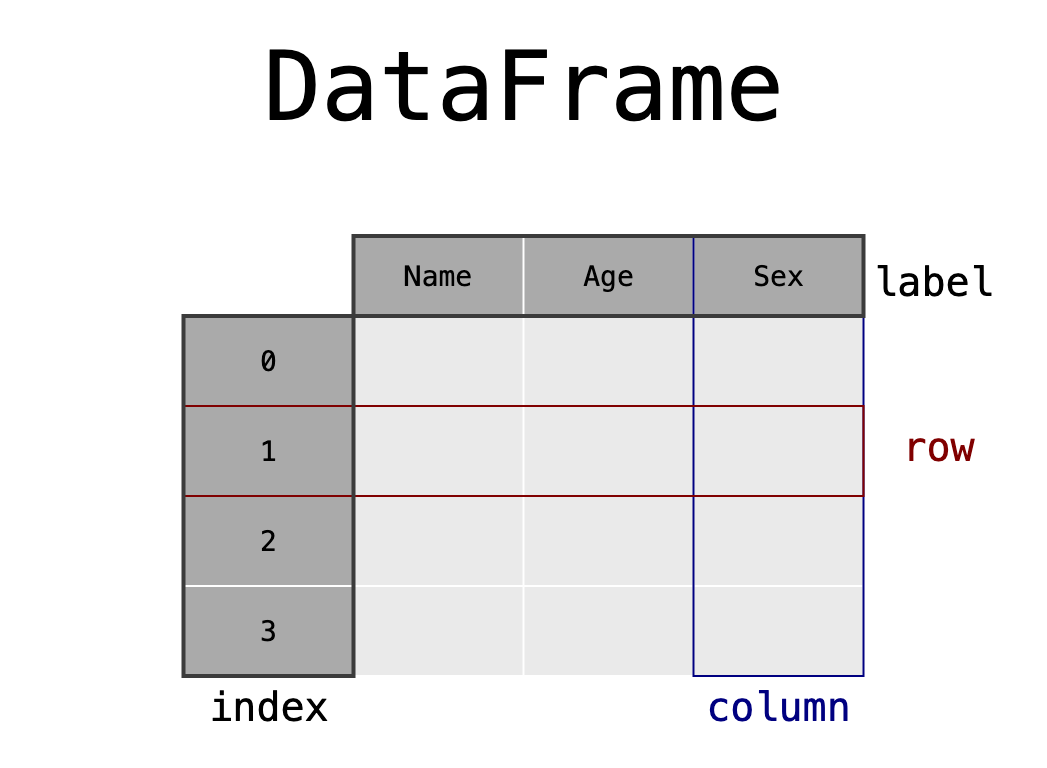

# Data frames Basic Information & Inspection

These operations are crucial for understanding the structure and content of your DataFrame:

### DataFrame Attributes (Structural Properties)

These attributes provide quick access to the fundamental structural information of the DataFrame:

*   `df.shape`: Returns a tuple representing the dimensionality of the DataFrame (rows, columns).
*   `df.columns`: Returns the column labels of the DataFrame as an Index object.
*   `df.index`: Returns the index (row labels) of the DataFrame.
*   `df.dtypes`: Returns a Series with the data type of each column.

### DataFrame Peeking

These operations allow for a rapid glance at the DataFrame's content:

*   `df.head(n=5)`: Views the first `n` (default 5) rows of the DataFrame. Useful for a quick preview of the data.
*   `df.tail(n=5)`: Views the last `n` (default 5) rows of the DataFrame. Useful for checking newly appended data or final entries.

### DataFrame Statistics

These methods provide comprehensive summaries and statistical insights into your DataFrame:

*   `df.info(verbose=True, null_counts=True)`: Provides a concise summary of the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage. `verbose=True` shows full summary, `null_counts=True` (deprecated in newer pandas, now part of default `info()` output) explicitly counts non-nulls.
*   `df.describe(percentiles=None, include=None, exclude=None)`: Generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. By default, it works for numerical columns. `include='all'` can be used to include object type columns, `include=['object']` for only object columns, and `exclude` to omit certain types. `percentiles` allows specifying custom percentiles.

In [42]:
import pandas as pd
import numpy as np

# Create a sample DataFrame for demonstration
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)

print("df [Sample DataFrame] =")
display(df)
print("\n" + "="*40 + "\n")

print(f"""1. DataFrame Attributes (Structural Properties):
   - df.shape: {df.shape}
   - df.index: {df.index}
   - df.columns: {df.columns}
   - df.keys(): {df.keys()}
   - df.dtypes:
{df.dtypes}

{"="*40}

""")

print(f"""2. DataFrame Peeking:
df.head(n=3):
{df.head(3)}

df.tail(n=2):
{df.tail(2)}

{"="*40}

""")

print(f"""3. DataFrame statistics:
df.info(verbose=True) =
""")
df.info(verbose=True)

print("\n" + "-"*40 + "\n")

print("\ndf.describe(include='all') = ")
display(df.describe(include='all'))


df [Sample DataFrame] =


,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M
3,David,28.0,Houston,95,M
4,Eve,32.0,Miami,88,F
5,Frank,40.0,Chicago,70,M
6,Grace,27.0,Boston,91,F




1. DataFrame Attributes (Structural Properties):
   - df.shape: (7, 5)
   - df.index: RangeIndex(start=0, stop=7, step=1)
   - df.columns: Index(['Name', 'Age', 'City', 'Score', 'Gender'], dtype='object')
   - df.keys(): Index(['Name', 'Age', 'City', 'Score', 'Gender'], dtype='object')
   - df.dtypes:
Name       object
Age       float64
City       object
Score       int64
Gender     object
dtype: object



2. DataFrame Peeking:
df.head(n=3):
      Name   Age         City  Score Gender
0    Alice  25.0     New York     85      F
1      Bob  30.0  Los Angeles     92      M
2  Charlie   NaN      Chicago     78      M

df.tail(n=2):
    Name   Age     City  Score Gender
5  Frank  40.0  Chicago     70      M
6  Grace  27.0   Boston     91      F



3. DataFrame statistics:
df.info(verbose=True) =

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    7 non-n

,Name,Age,City,Score,Gender
count,7,6.000000,7,7.000000,7
unique,7,NaN,6,NaN,2
top,Alice,NaN,Chicago,NaN,M
freq,1,NaN,2,NaN,4
mean,NaN,30.333333,NaN,85.571429,NaN
std,NaN,5.316641,NaN,8.810167,NaN
min,NaN,25.000000,NaN,70.000000,NaN
25%,NaN,27.250000,NaN,81.500000,NaN
50%,NaN,29.000000,NaN,88.000000,NaN
75%,NaN,31.500000,NaN,91.500000,NaN


# DataFrame Indexes & Labels

Write on how indexes can be changed,

# The Versatile Square Brackets `[]`

One of the most fundamental and powerful tools in Pandas for interacting with DataFrames and Series. They provide a concise and flexible way to perform both **data selection (indexing)** and **data assignment (modification)**.

## Core Functionality:

### 1. Data Selection and Indexing

When used for selection, `[]` allows you to retrieve specific subsets of data from your DataFrame.

#### 1.1 Column Selection
*   `df['ColumnLabel']`: Selects a **single column** by its label. The result is a Pandas **Series**.
*   `df[['ColumnLabel1', 'ColumnLabel2']]`: Selects **multiple columns** by providing a list of labels. The result is a **DataFrame**.

#### 1.2 Row Selection
*   **Boolean Indexing:** `df[boolean_series]` performs conditional selection. It filters rows based on a Series of `True`/`False` values, where only rows corresponding to `True` are returned. (e.g., `df[df['Age'] > 30]`)
*   **Slicing:** `df[start:end:[step]]` performs slicing of rows by implicit integer position. Similar to Python list slicing, the `end` position is *exclusive*. (e.g., `df[0:5]` selects rows from index 0 up to, but not including, 5).
*   **Fancy Indexing:** Supported using `df.loc` and `df.iloc` properties. Use `df.loc[list(row indexes)]` or `df.iloc[list(row integer indexes)]` for explicit position-based selection.

#### 1.3 Selecting rows and columns together
Use `df.loc[<Row selection>, <Column/Columns list>]]` or `df.iloc[list(row integer indexes), <Column/Columns list>]]` to select both rows and columns together.

### 2. Data Assignment and Modification

Use on LHS of an assignment to create new columns or modify existing ones.

*   **Creating New Columns:** If the specified column label does not exist, a new column is created with the provided values.
    *   `df['NewColumn'] = value_or_series`: Assigns a new column filled with a scalar value or a Series aligned by index.
*   **Modifying Existing Columns:** If the column label already exists, its values are updated.
    *   `df['ExistingColumn'] = new_values`: Updates all values in the 'ExistingColumn' with `new_values`.

## Views vs. Copies (NumPy Connection):

Pandas often relies on NumPy's internal memory management. When you select data using `[]`, it can sometimes return a *view* of the original DataFrame's data rather than a *copy*. This implies modifying the view could inadvertently modify the original DataFrame. For explicit copies, it's best practice to use the `.copy()` method (e.g., `df_subset = df[df['Age'] > 30].copy()`).

In [13]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)

# Column selections using []
print(f"""1.1 Selecting a single column
df['Name'] =
""")
display(df['Name'])
print("\n" + "-"*40 + "\n")

print(f"""1.1 Selecting multiple columns
df[['Name', 'City']] =
""")
display(df[['Name', 'City']])
print("\n" + "="*40 + "\n")

# Row selection using []
print(f"""1.2 Boolean indexing
df[df['Age'] > 30] =
""")
display(df[df['Age'] > 30])
print("\n" + "-"*40 + "\n")

print(f"""1.2 Slicing rows
df[0:3] =
""")
display(df[0:3])
print("\n" + "-"*40 + "\n")

print(f"""1.2 Row fancy indexing using loc
df.loc[[0, 2, 4]] =
""")
display(df.loc[[0, 2, 4]])
print("\n" + "="*40 + "\n")

print(f"""1.3 Selecting rows and columns together
Splicing using df.loc - df.loc[0:2, ['Name', 'City']] =
""")
display(df.loc[0:2, ['Name', 'City']])
print("\n" + "-"*40 + "\n")

print(f"""1.3 Selecting rows and columns together
Boolean indexing using loc - df.loc[df['Score'] > 80, ['Name', 'Age', 'Score']] =
""")
display(df.loc[df['Score'] > 80, ['Name', 'Age', 'Score']])
print("\n" + "="*40 + "\n")

print(f"""2.1 Data modification - Create new column
df['Score_Percentage'] = df['Score'] / 100 =
""")
df['Score_Percentage'] = df['Score'] / 100
display(df)
print("\n" + "-"*40 + "\n")

print(f"""2.2 Data modification - Modify existing column
df['Age'] = df['Age'] + 5 =
""")
df['Age'] = df['Age'] + 5
display(df)
print("\n" + "="*40 + "\n")

1.1 Selecting a single column
df['Name'] =



,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Eve
5,Frank
6,Grace



----------------------------------------

1.1 Selecting multiple columns
df[['Name', 'City']] =



,Name,City
0,Alice,New York
1,Bob,Los Angeles
2,Charlie,Chicago
3,David,Houston
4,Eve,Miami
5,Frank,Chicago
6,Grace,Boston




1.2 Boolean indexing
df[df['Age'] > 30] =



,Name,Age,City,Score,Gender
4,Eve,32.0,Miami,88,F
5,Frank,40.0,Chicago,70,M



----------------------------------------

1.2 Slicing rows
df[0:3] =



,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M



----------------------------------------

1.2 Row fancy indexing using loc
df.loc[[0, 2, 4]] =



,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
2,Charlie,NaN,Chicago,78,M
4,Eve,32.0,Miami,88,F




1.3 Selecting rows and columns together
Splicing using df.loc - df.loc[0:2, ['Name', 'City']] =



,Name,City
0,Alice,New York
1,Bob,Los Angeles
2,Charlie,Chicago



----------------------------------------

1.3 Selecting rows and columns together
Boolean indexing using loc - df.loc[df['Score'] > 80, ['Name', 'Age', 'Score']] =



,Name,Age,Score
0,Alice,25.0,85
1,Bob,30.0,92
3,David,28.0,95
4,Eve,32.0,88
6,Grace,27.0,91




2.1 Data modification - Create new column
df['Score_Percentage'] = df['Score'] / 100 =



,Name,Age,City,Score,Gender,Score_Percentage
0,Alice,25.0,New York,85,F,0.85
1,Bob,30.0,Los Angeles,92,M,0.92
2,Charlie,NaN,Chicago,78,M,0.78
3,David,28.0,Houston,95,M,0.95
4,Eve,32.0,Miami,88,F,0.88
5,Frank,40.0,Chicago,70,M,0.70
6,Grace,27.0,Boston,91,F,0.91



----------------------------------------

2.2 Data modification - Modify existing column
df['Age'] = df['Age'] + 5 =



,Name,Age,City,Score,Gender,Score_Percentage
0,Alice,30.0,New York,85,F,0.85
1,Bob,35.0,Los Angeles,92,M,0.92
2,Charlie,NaN,Chicago,78,M,0.78
3,David,33.0,Houston,95,M,0.95
4,Eve,37.0,Miami,88,F,0.88
5,Frank,45.0,Chicago,70,M,0.70
6,Grace,32.0,Boston,91,F,0.91


iloc, loc
### 2. Selecting Rows by Label (`.loc[]`)

The `.loc[]` accessor is primarily label-based, meaning you use the actual values of the index or column names to make selections.

*   **Selecting a Single Row:** Pass a single index label.
    *   `df.loc['RowLabel']`
*   **Selecting Multiple Rows:** Pass a list of index labels.
    *   `df.loc[['RowLabel1', 'RowLabel2']]`
*   **Selecting a Slice of Rows:** Use slice notation with labels. Note that with `.loc[]`, the end label in a slice *is* inclusive.
    *   `df.loc['StartLabel':'EndLabel']`
*   **Selecting Rows and Columns by Label:** Combine row and column labels/lists/slices.
    *   `df.loc['RowLabel', 'ColumnLabel']`
    *   `df.loc[['RowLabel1', 'RowLabel2'], ['ColumnLabel1', 'ColumnLabel2']]`

### 3. Selecting Rows by Position (`.iloc[]`)

The `.iloc[]` accessor is primarily integer-location based, meaning you use the integer position (0-based) of the rows and columns to make selections.

*   **Selecting a Single Row:** Pass a single integer index.
    *   `df.iloc[row_index]`
*   **Selecting Multiple Rows:** Pass a list of integer indices.
    *   `df.iloc[[index1, index2]]`
*   **Selecting a Slice of Rows:** Use slice notation with integer positions. Similar to Python list slicing, the end position in a slice is *exclusive*.
    *   `df.iloc[start_index:end_index]`
*   **Selecting Rows and Columns by Position:** Combine integer row and column positions/lists/slices.
    *   `df.iloc[row_index, col_index]`
    *   `df.iloc[[row_index1, row_index2], [col_index1, col_index2]]`



# Selection & Subsetting

Selection and subsetting are fundamental operations for isolating specific parts of your DataFrame. This allows you to focus on relevant data for analysis, modification, or further processing. Pandas offers several powerful ways to select data, primarily using square brackets `[]`, and the explicit `loc` and `iloc` accessors.

### 1. Selecting Columns

*   **Single Column:** You can select a single column by treating the DataFrame like a dictionary, passing the column name as a string inside square brackets. This returns a Pandas Series.
    *   `df['ColumnName']`
*   **Multiple Columns:** To select multiple columns, pass a list of column names inside square brackets. This returns a DataFrame.
    *   `df[['ColumnName1', 'ColumnName2']]`

### 2. Selecting Rows by Label (`.loc[]`)

The `.loc[]` accessor is primarily label-based, meaning you use the actual values of the index or column names to make selections.

*   **Selecting a Single Row:** Pass a single index label.
    *   `df.loc['RowLabel']`
*   **Selecting Multiple Rows:** Pass a list of index labels.
    *   `df.loc[['RowLabel1', 'RowLabel2']]`
*   **Selecting a Slice of Rows:** Use slice notation with labels. Note that with `.loc[]`, the end label in a slice *is* inclusive.
    *   `df.loc['StartLabel':'EndLabel']`
*   **Selecting Rows and Columns by Label:** Combine row and column labels/lists/slices.
    *   `df.loc['RowLabel', 'ColumnLabel']`
    *   `df.loc[['RowLabel1', 'RowLabel2'], ['ColumnLabel1', 'ColumnLabel2']]`

### 3. Selecting Rows by Position (`.iloc[]`)

The `.iloc[]` accessor is primarily integer-location based, meaning you use the integer position (0-based) of the rows and columns to make selections.

*   **Selecting a Single Row:** Pass a single integer index.
    *   `df.iloc[row_index]`
*   **Selecting Multiple Rows:** Pass a list of integer indices.
    *   `df.iloc[[index1, index2]]`
*   **Selecting a Slice of Rows:** Use slice notation with integer positions. Similar to Python list slicing, the end position in a slice is *exclusive*.
    *   `df.iloc[start_index:end_index]`
*   **Selecting Rows and Columns by Position:** Combine integer row and column positions/lists/slices.
    *   `df.iloc[row_index, col_index]`
    *   `df.iloc[[row_index1, row_index2], [col_index1, col_index2]]`

### 4. Conditional Selection (Boolean Indexing)

This is a very powerful way to select rows based on one or more conditions applied to the values within columns. It uses boolean Series (True/False) to filter the DataFrame.

*   `df[df['ColumnName'] > value]`
*   `df[(df['Column1'] > value1) & (df['Column2'] == 'text')]`

In [41]:
import pandas as pd
import numpy as np

# Re-create the sample DataFrame for demonstration
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [25, 30, np.nan, 28, 32, 40, 27],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Chicago', 'Boston'],
    'Score': [85, 92, 78, 95, 88, 70, 91],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F']
}
df = pd.DataFrame(data)

print("--- Original DataFrame ---")
display(df)
print("\n" + "="*40 + "\n")

# 1. Selecting Columns
print("1.1 Selecting a single column ('Name'):")
display(df['Name'])
print("\n" + "-"*40 + "\n")

print("1.2 Selecting multiple columns (['Name', 'City']):")
display(df[['Name', 'City']])
print("\n" + "="*40 + "\n")

# 2. Selecting Rows by Label (`.loc[]`)
print("2.1 Selecting a single row by index label (index 0):")
display(df.loc[0])
print("\n" + "-"*40 + "\n")

print("2.2 Selecting multiple rows by index labels ([1, 3]):")
display(df.loc[[1, 3]])
print("\n" + "-"*40 + "\n")

print("2.3 Selecting a slice of rows by index labels (0 to 2, inclusive):")
display(df.loc[0:2])
print("\n" + "-"*40 + "\n")

print("2.4 Selecting specific rows and columns by label (rows 0,1, columns 'Name', 'Age'):")
display(df.loc[0:1, ['Name', 'Age']])
print("\n" + "="*40 + "\n")

# 3. Selecting Rows by Position (`.iloc[]`)
print("3.1 Selecting a single row by integer position (index 0):")
display(df.iloc[0])
print("\n" + "-"*40 + "\n")

print("3.2 Selecting multiple rows by integer positions ([1, 3]):")
display(df.iloc[[1, 3]])
print("\n" + "-"*40 + "\n")

print("3.3 Selecting a slice of rows by integer positions (0 up to but not including 3):")
display(df.iloc[0:3])
print("\n" + "-"*40 + "\n")

print("3.4 Selecting specific rows and columns by integer position (rows 0,1, columns 0,1):")
display(df.iloc[0:2, 0:2])
print("\n" + "="*40 + "\n")

# 4. Conditional Selection (Boolean Indexing)
print("4.1 Selecting rows where 'Age' is greater than 30:")
display(df[df['Age'] > 30])
print("\n" + "-"*40 + "\n")

print("4.2 Selecting rows where 'City' is 'Chicago' AND 'Score' is less than 80:")
display(df[(df['City'] == 'Chicago') & (df['Score'] < 80)])
print("\n" + "="*40 + "\n")

--- Original DataFrame ---


,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M
3,David,28.0,Houston,95,M
4,Eve,32.0,Miami,88,F
5,Frank,40.0,Chicago,70,M
6,Grace,27.0,Boston,91,F




1.1 Selecting a single column ('Name'):


,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Eve
5,Frank
6,Grace



----------------------------------------

1.2 Selecting multiple columns (['Name', 'City']):


,Name,City
0,Alice,New York
1,Bob,Los Angeles
2,Charlie,Chicago
3,David,Houston
4,Eve,Miami
5,Frank,Chicago
6,Grace,Boston




2.1 Selecting a single row by index label (index 0):


,0
Name,Alice
Age,25.0
City,New York
Score,85
Gender,F



----------------------------------------

2.2 Selecting multiple rows by index labels ([1, 3]):


,Name,Age,City,Score,Gender
1,Bob,30.0,Los Angeles,92,M
3,David,28.0,Houston,95,M



----------------------------------------

2.3 Selecting a slice of rows by index labels (0 to 2, inclusive):


,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M



----------------------------------------

2.4 Selecting specific rows and columns by label (rows 0,1, columns 'Name', 'Age'):


,Name,Age
0,Alice,25.0
1,Bob,30.0




3.1 Selecting a single row by integer position (index 0):


,0
Name,Alice
Age,25.0
City,New York
Score,85
Gender,F



----------------------------------------

3.2 Selecting multiple rows by integer positions ([1, 3]):


,Name,Age,City,Score,Gender
1,Bob,30.0,Los Angeles,92,M
3,David,28.0,Houston,95,M



----------------------------------------

3.3 Selecting a slice of rows by integer positions (0 up to but not including 3):


,Name,Age,City,Score,Gender
0,Alice,25.0,New York,85,F
1,Bob,30.0,Los Angeles,92,M
2,Charlie,NaN,Chicago,78,M



----------------------------------------

3.4 Selecting specific rows and columns by integer position (rows 0,1, columns 0,1):


,Name,Age
0,Alice,25.0
1,Bob,30.0




4.1 Selecting rows where 'Age' is greater than 30:


,Name,Age,City,Score,Gender
4,Eve,32.0,Miami,88,F
5,Frank,40.0,Chicago,70,M



----------------------------------------

4.2 Selecting rows where 'City' is 'Chicago' AND 'Score' is less than 80:


,Name,Age,City,Score,Gender
2,Charlie,NaN,Chicago,78,M
5,Frank,40.0,Chicago,70,M
